In [69]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [70]:
df = pd.read_csv("House Price Prediction Dataset.csv")

In [71]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [72]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [73]:
print(f"Total rows = {df.shape[0]}\nTotal Columns = {df.shape[1]}")

Total rows = 2000
Total Columns = 10


In [74]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [76]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [77]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [78]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [79]:
df['Garage'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
# Best Approach: One-Hot Encoding
# drop_first=True zaroori hai taake data duplicate na ho
df_final = pd.get_dummies(df, columns=['Location'], drop_first=True, dtype=int)

print("✅ Encoding Done! Data Training ke liye ready hai.")
df_final.head()

✅ Encoding Done! Data Training ke liye ready hai.


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Rural,Location_Suburban,Location_Urban
0,1,1360,5,4,3,1970,Excellent,No,149919,0,0,0
1,2,4272,5,4,3,1958,Excellent,No,424998,0,0,0
2,3,3592,2,2,3,1938,Good,No,266746,0,0,0
3,4,966,4,2,2,1902,Fair,Yes,244020,0,1,0
4,5,4926,1,4,2,1975,Fair,Yes,636056,0,0,0


In [81]:
# 1. Pehle data ko clean karein (Spaces hatayein aur Title case karein)
# str.strip() -> Side ki spaces hatata hai
# str.title() -> 'good' ko 'Good' bana deta hai
df_final['Condition'] = df_final['Condition'].astype(str).str.strip().str.title()

# 2. Ab Dobara Mapping Dictionary Banayein
condition_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

# 3. Ab Map Karein
df_final['Condition'] = df_final['Condition'].map(condition_mapping)

# Check Result
print("✅ Ab Check Karein:")
print(df_final['Condition'].head())
print(f"NaN Values: {df_final['Condition'].isnull().sum()}") # Ye 0 hona chahiye

✅ Ab Check Karein:
0    3
1    3
2    2
3    1
4    1
Name: Condition, dtype: int64
NaN Values: 0


In [82]:
df_final

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Rural,Location_Suburban,Location_Urban
0,1,1360,5,4,3,1970,3,No,149919,0,0,0
1,2,4272,5,4,3,1958,3,No,424998,0,0,0
2,3,3592,2,2,3,1938,2,No,266746,0,0,0
3,4,966,4,2,2,1902,1,Yes,244020,0,1,0
4,5,4926,1,4,2,1975,1,Yes,636056,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,0,No,295620,0,1,0
1996,1997,3046,5,2,1,2019,0,Yes,580929,0,1,0
1997,1998,1062,5,1,2,1903,0,No,476925,1,0,0
1998,1999,4062,3,1,2,1936,3,Yes,161119,0,0,1


In [83]:
# --- Step 1: Safai (Cleaning) ---
# Extra spaces hatana aur Title case karna ('yes' -> 'Yes')
df_final['Garage'] = df_final['Garage'].astype(str).str.strip().str.title()

# --- Step 2: Mapping (0 aur 1) ---
garage_mapping = {
    'No': 0,
    'Yes': 1
}

# --- Step 3: Apply ---
df_final['Garage'] = df_final['Garage'].map(garage_mapping)

# --- Check Result ---
print("✅ Garage Column Fixed!")
print(df_final['Garage'].value_counts()) # Batayega kitne 1 hain aur kitne 0
print(f"NaN Values: {df_final['Garage'].isnull().sum()}")

✅ Garage Column Fixed!
Garage
0    1038
1     962
Name: count, dtype: int64
NaN Values: 0


In [84]:
df_final.drop(columns=['Id'],inplace=True)

In [85]:
df_final.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Rural,Location_Suburban,Location_Urban
0,1360,5,4,3,1970,3,0,149919,0,0,0
1,4272,5,4,3,1958,3,0,424998,0,0,0
2,3592,2,2,3,1938,2,0,266746,0,0,0
3,966,4,2,2,1902,1,1,244020,0,1,0
4,4926,1,4,2,1975,1,1,636056,0,0,0


In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
df = df_final

# --- STEP 2: X aur y Alag Karna ---
# Aapke data mein 'Price' target hai
X = df.drop(columns=['Price'])
y = df['Price']

# --- STEP 3: Training ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hum Gradient Boosting use karenge kyunki Real Data complex hota hai
print("\n🚀 Training Model on YOUR Data...")
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05)
model.fit(X_train, y_train)

# --- STEP 4: Evaluation ---
y_pred = model.predict(X_test)

# Agar data bohot kam (3 rows) hua to error aa sakta hai, isliye check
if len(y_test) > 0:
    mae = mean_absolute_error(y_test, y_pred)
    acc = r2_score(y_test, y_pred) * 100
    print(f"\n📊 Report Card:")
    print(f"💰 Average Error: ${mae:,.2f}")
    print(f"🎯 Accuracy: {acc:.2f}%")
else:
    print("\n⚠️ Data bohot kam tha testing ke liye. Pura data train ho gaya.")
    print("Predicted Price for sample:", y_pred)


🚀 Training Model on YOUR Data...

📊 Report Card:
💰 Average Error: $250,632.62
🎯 Accuracy: -9.20%


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

df = df_final

# --- 2. OUTLIER REMOVAL (Safai Abhiyan) ---
print(f"🧹 Safai se pehle rows: {len(df)}")

# Rule: Price per SqFt calculate karo
df['Price_Per_SqFt'] = df['Price'] / df['Area']

# Jo log bohot zyada mehnge ya bohot saste hain, unhein nikal do
# (Hum sirf beech ke 80% logon ko rakhenge jo normal hain)
Q1 = df['Price_Per_SqFt'].quantile(0.10)
Q3 = df['Price_Per_SqFt'].quantile(0.90)
df_clean = df[(df['Price_Per_SqFt'] >= Q1) & (df['Price_Per_SqFt'] <= Q3)]

print(f"✨ Safai ke baad rows: {len(df_clean)}")
print("(Wo 966 SqFt wala mehnga ghar shayed nikal gaya hoga)")

# --- 3. Training on Clean Data ---
X = df_clean.drop(columns=['Price', 'Price_Per_SqFt']) # Helper column hata diya
y = df_clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)

# --- 4. Result ---
if len(y_test) > 0:
    y_pred = model.predict(X_test)
    acc = r2_score(y_test, y_pred) * 100
    print(f"\n🚀 New Accuracy: {acc:.2f}%")
else:
    print("\n⚠️ Data bohot kam bacha hai testing ke liye, lekin logic theek ho gaya hai!")

🧹 Safai se pehle rows: 2000
✨ Safai ke baad rows: 1600
(Wo 966 SqFt wala mehnga ghar shayed nikal gaya hoga)

🚀 New Accuracy: 10.96%


In [91]:
print(f"📚 Total Data Rows: {len(df)}")
print(f"🎓 Training ke liye mila: {len(X_train)} rows")
print(f"📝 Test ke liye bacha: {len(X_test)} rows")

📚 Total Data Rows: 2000
🎓 Training ke liye mila: 1280 rows
📝 Test ke liye bacha: 320 rows


📊 --- RISHTA REPORT (Correlation) ---
Price                1.000000
Price_Per_SqFt       0.525243
Floors               0.055890
Location_Suburban    0.040303
YearBuilt            0.004845
Garage               0.002842
Location_Rural       0.001890
Area                 0.001542
Bedrooms            -0.003471
Condition           -0.010576
Bathrooms           -0.015737
Location_Urban      -0.038312
Name: Price, dtype: float64


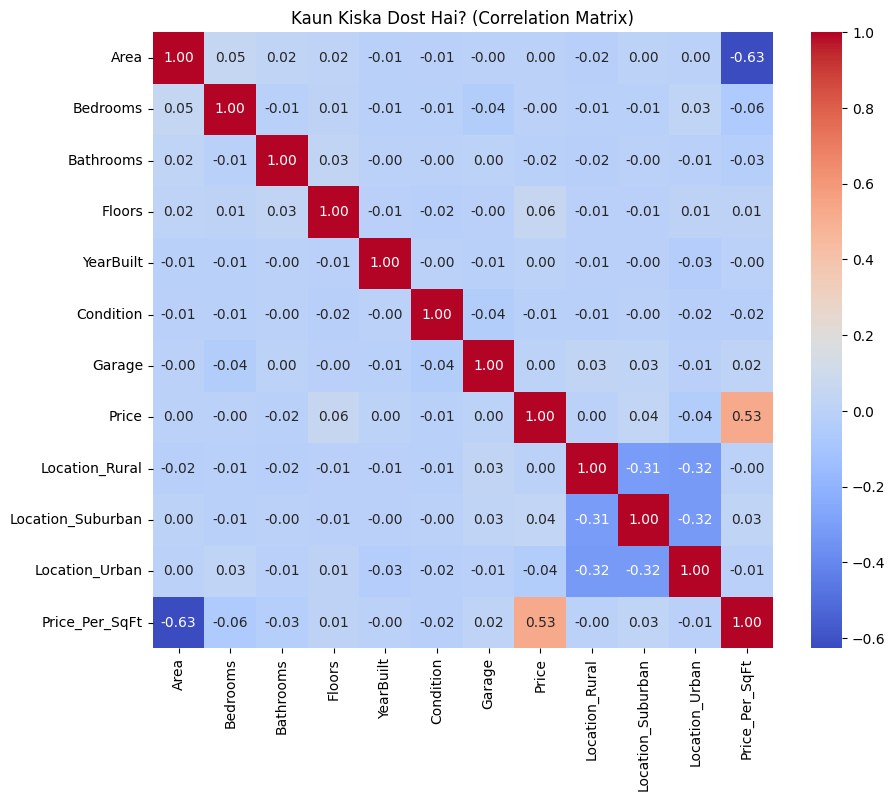

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Correlation Check ---
# Hum dekhna chahte hain ke baaki columns ka 'Price' se kya rishta hai
correlation = df_final.corr()['Price'].sort_values(ascending=False)

print("📊 --- RISHTA REPORT (Correlation) ---")
print(correlation)

# Visual (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Kaun Kiska Dost Hai? (Correlation Matrix)")
plt.show()